# Library Packages for Data Analysis Manipulation and Machine Learning

In [1]:
#Import linear algebra and data manipulation packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import unidecode as uni
import calendar
from datetime import datetime
from tabulate import tabulate

#Import plotting packages
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

#Import machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

# Import Listings Dataset

In [2]:
#import the listings dataset
listings_df = pd.read_csv('C:/Users/polym/listings.csv')

#find number of listings and number of hosts
listings_number = listings_df['id'].count()
hosts_number = len(listings_df['host_id'].unique())

print('listings.csv dataset contains information on %d listings provided by %d hosts.' % (listings_number, hosts_number))

#print first 10 rows of listings dataset                                                                                          #hosts_number))
listings_df.head()

listings.csv dataset contains information on 9673 listings provided by 4809 hosts.


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211223003724,2021-12-23,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.84,4.50,4.66,00000957568,t,6,6,0,0,0.25
1,10990,https://www.airbnb.com/rooms/10990,20211223003724,2021-12-23,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.91,4.81,4.79,00001070920,t,6,6,0,0,0.48
2,10993,https://www.airbnb.com/rooms/10993,20211223003724,2021-12-23,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.83,4.80,00000957080,t,6,6,0,0,0.67
3,10995,https://www.airbnb.com/rooms/10995,20211223003724,2021-12-23,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.88,4.80,4.80,00000957422,t,6,6,0,0,0.19
4,27262,https://www.airbnb.com/rooms/27262,20211223003724,2021-12-23,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,00000957579,t,6,6,0,0,0.15


<AxesSubplot:>

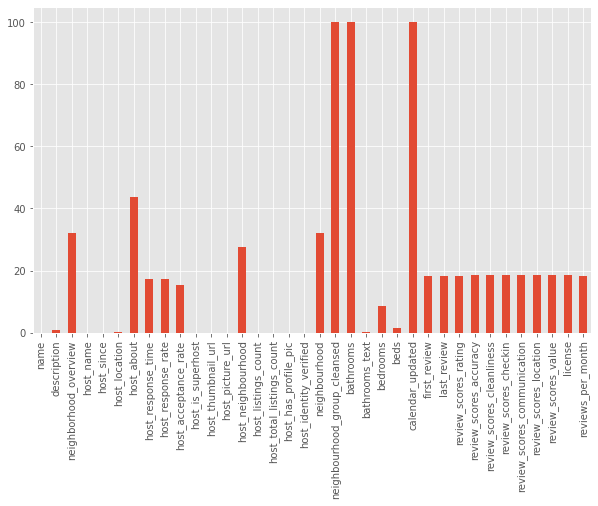

In [3]:
#find percentage of missing values for each column
listings_missing_df = listings_df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
plt.rcParams["figure.figsize"] = (10,6)
listings_columns_with_nan.plot.bar()

# Import Calendar Dataset

In [4]:
#read the dataset
calendar_df = pd.read_csv('C:/Users/polym/calendar.csv')

#find number of rows and columns in dataset
rows_num = calendar_df.shape[0]
cols_num=calendar_df.shape[1]

#find first and last date of the calendar
min_date = calendar_df['date'].min()
max_date = calendar_df['date'].max()

print('calendar.csv dataset contains %d rows and %d columns.' % (rows_num,cols_num))
print('The first date of observation is %s and the last date is %s.' % (min_date, max_date))

#print first 10 rows of calendar dataset                                                                                          #hosts_number))
calendar_df.head(10)

calendar.csv dataset contains 3530645 rows and 7 columns.
The first date of observation is 2021-12-23 and the last date is 2022-12-22.


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1927601,2021-12-23,f,$65.00,$65.00,1,14
1,1927601,2021-12-24,t,$65.00,$65.00,1,14
2,1927601,2021-12-25,t,$65.00,$65.00,1,14
3,1927601,2021-12-26,t,$65.00,$65.00,1,14
4,1927601,2021-12-27,t,$65.00,$65.00,1,14
5,1927601,2021-12-28,t,$65.00,$65.00,1,14
6,1927601,2021-12-29,t,$65.00,$65.00,1,14
7,1927601,2021-12-30,t,$65.00,$65.00,1,14
8,1927601,2021-12-31,t,$65.00,$65.00,1,14
9,1927601,2022-01-01,t,$65.00,$65.00,1,14


# Missing Values in Calendar Dataset

<AxesSubplot:title={'center':'Missing values per column, %'}>

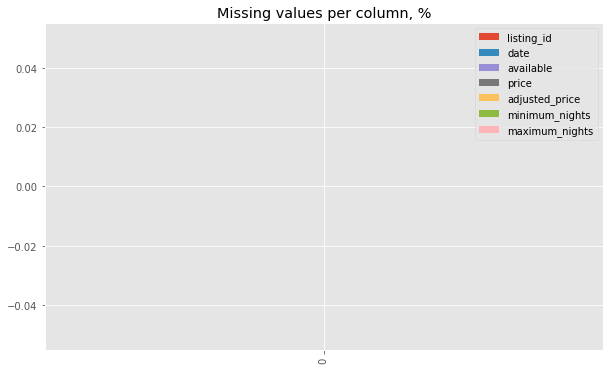

In [5]:
#get percentage of missing values for each column in dataset
calendar_missing_df = pd.DataFrame([calendar_df.isnull().mean()*100])

#plot the results
plt.rcParams["figure.figsize"] = (10,6)
calendar_missing_df.plot.bar(title='Missing values per column, %')

# Preprocess Step

# i) Left Join Calendar and Listings datasets on Listing_id

In [6]:
#rename id column as listing_id in order to match the join afterwards
listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})

#left join two datasets on listing_id to obtain a combined dataframe
df = pd.merge(calendar_df, listings_df, on = 'listing_id',how="left")

# ii) Columns Data Transformations 

In [7]:
#extract month from date represented as a string
df['month'] = df.apply(lambda row: int(row['date'].split('-')[1]),axis=1)

#extract year from date represented as a string
df['year'] = df.apply(lambda row: int(row['date'].split('-')[0]),axis=1)

#convert price to number eliminating the $ sign
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")

#convert adjusted price to number eliminating the $ sign
df['adjusted_price'] = df['adjusted_price'].astype(str)
df['adjusted_price'] = df['adjusted_price'].str.replace("[$, ]", "").astype("float")

#extract month name from month represented as an integer
df["month_name"]=df['month'].apply(lambda row: calendar.month_abbr[row])

#extract day name from month represented as date 
df["day_name"]=df['date'].apply(lambda row: pd.Timestamp(row).day_name())

# iii) Remove Missing Rows and Impute Missing Information

In [8]:
#remove rows from dataframe where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price_x'])

#impute missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)
    
#impute in missing values for bedrooms and beds with mode
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
    
    
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']

#iterate over all review_score_columns to impute with the mean of each respective column
for column in review_scores_columns:    
    df[column].fillna(df[column].mean(), inplace = True)

# iii) Drop Redundant or Full Missing Columns

In [9]:
#the list of irrelevant columns
columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'description',
                    'neighbourhood', 'neighbourhood_cleansed',"neighbourhood_group_cleansed","bathrooms",
                   'neighborhood_overview', 'picture_url',
                    'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                    'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'license', 'price_y',
                  'reviews_per_month','date','price_x','host_response_rate','amenities','minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','number_of_reviews_ltm', 'number_of_reviews_l30d']

#drop only the irrelevant columns
df=df.drop(columns=columns_to_drop)

# iv) Filter only listings of 2022

In [10]:
#we will focus only on listings of 2022
df=df[df["year"]==2022]
df.shape

(3443588, 39)

# Q1: Which is the best period to visit Athens?

# Q1.a: Monthly Price Seasonality (Figure)

(array([ 80.,  90., 100., 110., 120., 130., 140., 150.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

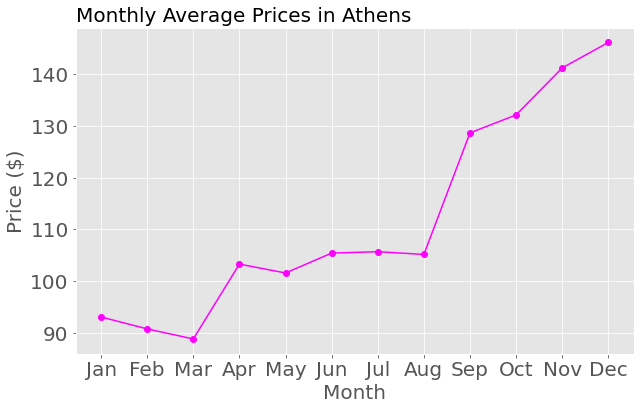

In [11]:
#set figure size
plt.rcParams["figure.figsize"] = (10,6)

#set x tick-marks
x_ticks_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#group by month and month name and aggregate over average price
my=df.groupby(['month',"month_name"],sort = True).mean()['price']

#drop index month_name
my=my.reset_index(level=["month_name"],drop=True)

#object oriented programming for the plot
fig, ax = plt.subplots(1,1) 
ax.plot(list(my.index),my.values,marker = 'o',color="fuchsia")

#set number of ticks for x-axis
ax.set_xticks(list(my.index))

#set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=20)

#set ylabel
ax.set_ylabel("Price ($)", fontsize=20)

#set xlabel
ax.set_xlabel("Month", fontsize=20)

#set title
plt.title("Monthly Average Prices in Athens",loc='left', fontsize=20)

#set yticks
plt.yticks(fontsize=20)

# Q1.a: Monthly Price Seasonality (Summary Table)

In [12]:
#group by month and aggregate over average price with mean, std, count reseting the index of month
my=df[['month','price']].groupby('month').agg(['mean','std','count']).round(2).reset_index()

#convert month column and into month name
my["month"]=my['month'].apply(lambda x: calendar.month_abbr[x])

#rename columns at level1
my.rename(columns={'mean': 'Average','std':'Standard Deviation','count':'#Listings'},level=1,inplace=True) 

#rename columns at level0
my.rename(columns={'month': 'Month','price':'Price'},level=0,inplace=True) 

#set index as Month
my.set_index('Month',inplace=True)

print(tabulate(my, headers=["Month","Average Price","Standard Deviation", "#Listings"], tablefmt='fancy_grid',showindex='always'))

╒═════════╤═════════════════╤══════════════════════╤═════════════╕
│ Month   │   Average Price │   Standard Deviation │   #Listings │
╞═════════╪═════════════════╪══════════════════════╪═════════════╡
│ Jan     │           93.05 │               409.93 │      299863 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ Feb     │           90.74 │               391.53 │      270844 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ Mar     │           88.79 │               343.93 │      299863 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ Apr     │          103.27 │               445.07 │      290190 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ May     │          101.55 │               409.41 │      299863 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ Jun     │          105.4  │               429.2  │      290190 │
├─────────┼─────────────────┼──────────────────────┼──────────

# Q1.b: Daily Price Seasonality (Figure)

(array([110.25, 110.5 , 110.75, 111.  , 111.25, 111.5 , 111.75, 112.  ,
        112.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

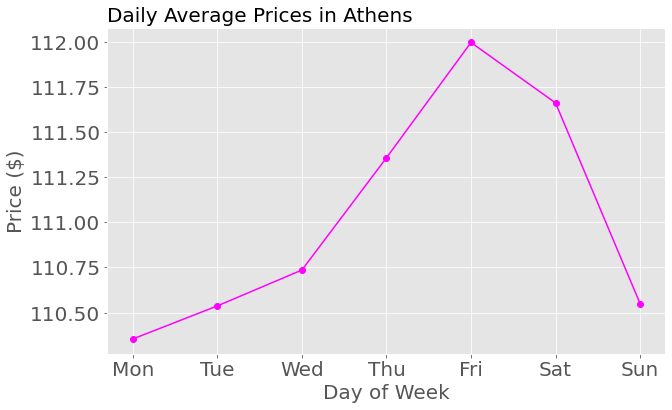

In [13]:
#set figure size
plt.rcParams["figure.figsize"] = (10,6)

#set x tick-marks
x_ticks_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

#group by day_name name and aggregate over average price
my=df.groupby(['day_name'],sort = True).mean()['price']

#reset index day_name
my=my.reset_index()

#substitute day_name with a new list
my["day_name"]=[5,1,6,7,4,2,3]

#set index as day_name
my.set_index('day_name',inplace=True)

#sort dataframe based on the index
my.sort_index(inplace=True)

#object oriented programming for the plot
fig, ax = plt.subplots(1,1) 
ax.plot(list(my.index),my.values,marker = 'o',color="fuchsia")

#set number of ticks for x-axis
ax.set_xticks(list(my.index))

#set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=20)

#set ylabel
ax.set_ylabel("Price ($)",fontsize=20)

#set xlabel
ax.set_xlabel("Day of Week",fontsize=20)

#set title
plt.title("Daily Average Prices in Athens",loc='left',fontsize=20)

#set yticks
plt.yticks(fontsize=20)

# Q1.b: Daily Price Seasonality (Summary Table)

In [14]:
#group by day_name and aggregate over average price with mean, std, count reseting the index of day_name
my=df[["day_name","price"]].groupby(['day_name'],sort = True).agg(['mean','std','count']).round(2)
my=my.reset_index()

#substitute day_name with a new list
my["day_name"]=[5,1,6,7,4,2,3]

#set index as day_name
my.set_index('day_name',inplace=True)

#sort by the index
my.sort_index(inplace=True)
my=my.reset_index()

#substitute day_name with a new list
my["day_name"]=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

#set index as day_name
my.set_index('day_name',inplace=True)

print(tabulate(my, headers=["Day of Week","Average Price","Standard Deviation", "#Listings"], tablefmt='fancy_grid',showindex='always'))

╒═══════════════╤═════════════════╤══════════════════════╤═════════════╕
│ Day of Week   │   Average Price │   Standard Deviation │   #Listings │
╞═══════════════╪═════════════════╪══════════════════════╪═════════════╡
│ Mon           │          110.35 │               509.83 │      493323 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Tue           │          110.54 │               511.61 │      493323 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Wed           │          110.74 │               512.36 │      493323 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Thu           │          111.36 │               515.82 │      493323 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Fri           │          112    │               512    │      483650 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Sat           │          111.66 │               5

# Q2: Which are the most expensive, popular property and room types in Athens?

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

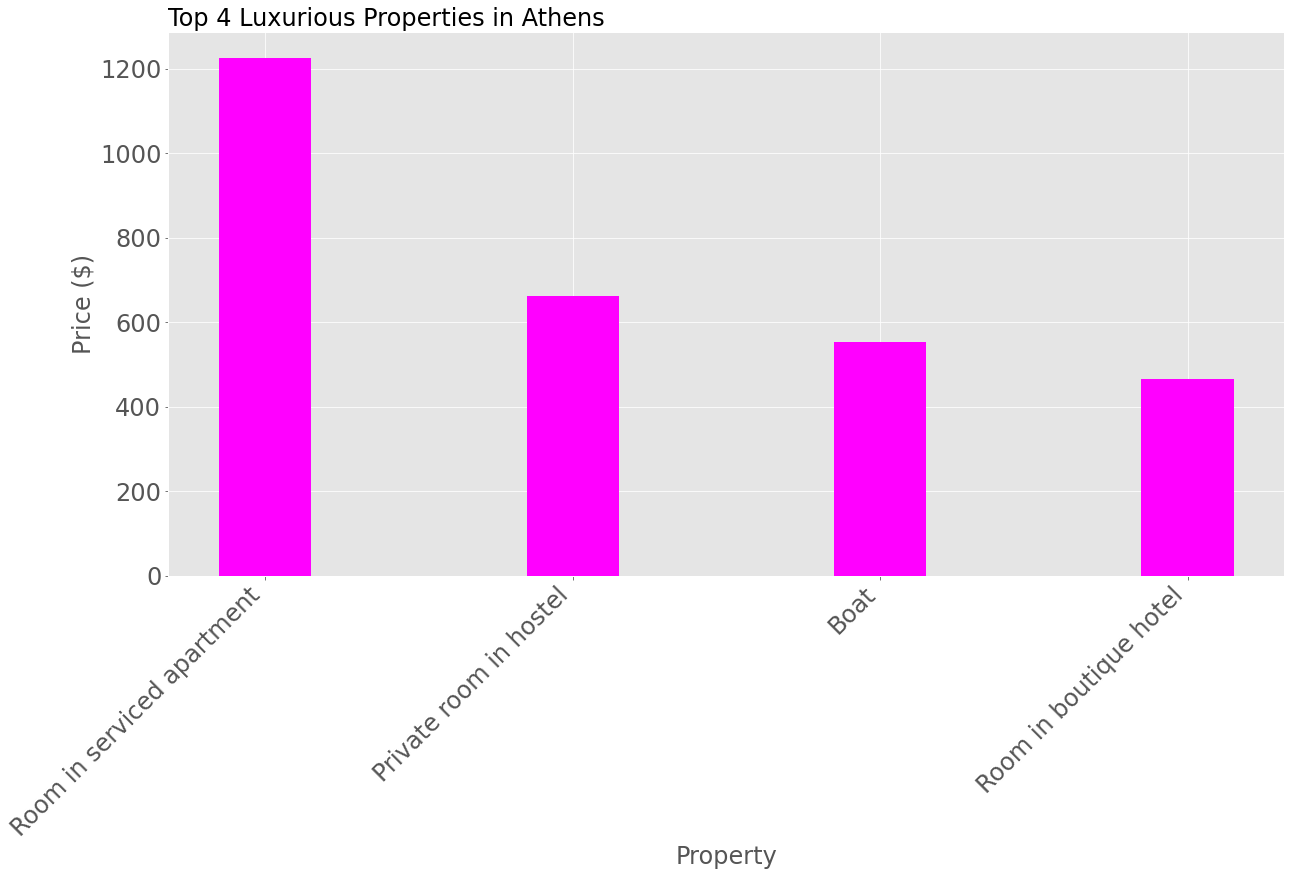

In [15]:
#set figure size
plt.rcParams["figure.figsize"] = (20,10)

#group by property_type and aggregate over average price by sorting descending
my=df.groupby(['property_type']).mean().sort_values('price', ascending=False)["price"]

#barplot of top 4 luxurious properties type
plt.bar(list(my.index)[0:4],my.values[0:4],width=0.3,color="fuchsia")
plt.ylabel("Price ($)",fontsize=24)
plt.xlabel("Property",fontsize=24)
plt.title("Top 4 Luxurious Properties in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

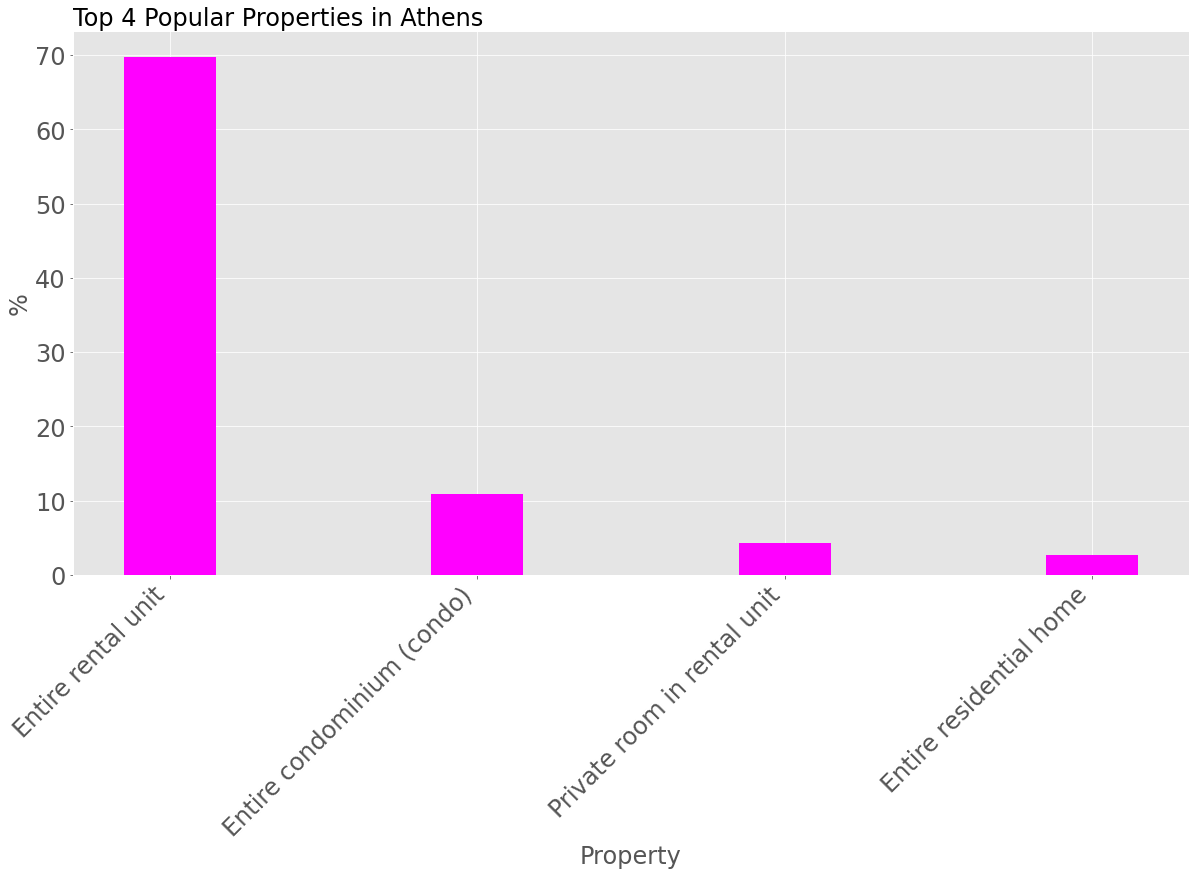

In [16]:
#percentages of property_type 
my=round(df["property_type"].value_counts()/df.shape[0]*100,2)[0:8]

#barplot of top 4 popular properties type
plt.bar(list(my.index)[0:4],my.values[0:4],width=0.3,color="fuchsia")
plt.ylabel("%",fontsize=24)
plt.xlabel("Property",fontsize=24)
plt.title("Top 4 Popular Properties in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

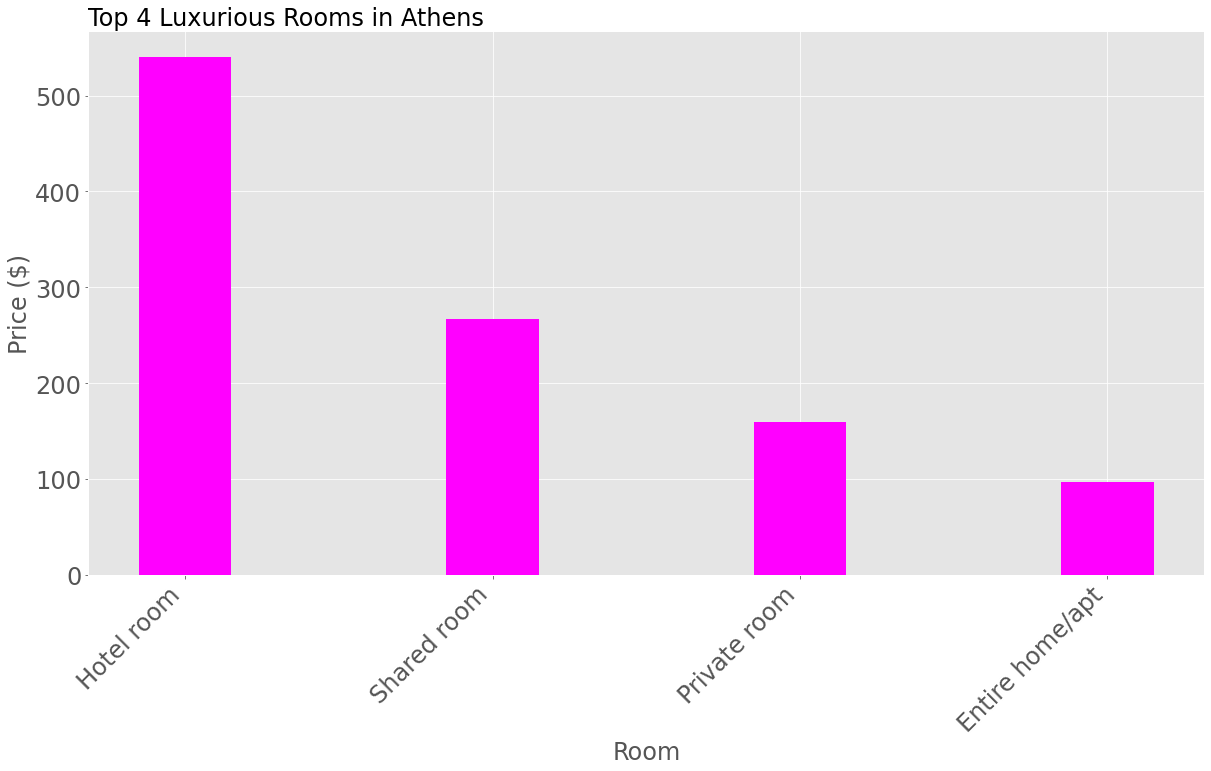

In [17]:
#set figure size
plt.rcParams["figure.figsize"] = (20,10)

#group by room_type and aggregate over average price by sorting descending
my=df.groupby(['room_type']).mean().sort_values('price', ascending=False)["price"]

#barplot of top 4 luxurious room types
plt.bar(list(my.index),my.values,width=0.3,color="fuchsia")
plt.ylabel("Price ($)",fontsize=24)
plt.xlabel("Room",fontsize=24)
plt.title("Top 4 Luxurious Rooms in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

In [ ]:
#percentages of room_type 
my=round(df["room_type"].value_counts()/df.shape[0]*100,2)

#barplot of top 4 popular room types
plt.bar(list(my.index),my.values,width=0.3,color="fuchsia")
plt.ylabel("%",fontsize=24)
plt.xlabel("Room",fontsize=24)
plt.title("Top 4 Popular Rooms in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

# Q3: Which are the most important factors of rental landscape activity that decide the reservation price?

# Drop Redundant Columns for Modelling Phase

In [27]:
#the list of irrelevant columns
columns_to_drop = ['listing_id','host_since','host_verifications','year','bathrooms_text','day_name','month_name','month','maximum_nights_x','minimum_nights_x','maximum_nights_y','minimum_nights_y']

#drop only the irrelevant columns
df2=df.drop(columns=columns_to_drop)

# Sample 200000 Rows from 3 Million of Listings and Filter only for Price<=2000

In [28]:
#Set random state to 2022 to allow reproducable results
RAND_STATE=2022

#Sample randomly 200000 rows from almost 3 millions of listings
df2=df2.sample(n=200000,random_state=RAND_STATE)

#Filter only for prices below 2000 in order to allow regression to handle only moderate values (extreme values may decrease the predictive performance)
df2=df2[df2["price"]<=2000]

# Transform the Categorical Variables into dummies and drop the original one

In [29]:
#turn categorical columns into dummies (baseline function of udacity course)
cat_columns = list(df2.select_dtypes(include=['object']).columns)
    
for col in  cat_columns:
    df2 = pd.concat([df2.drop(col, axis=1), pd.get_dummies(df2[col], prefix=col, prefix_sep='_',

                                                         drop_first=True)], axis=1)

# Define Design Matrix and Target Variable and train/test Split

In [45]:
#prepare train and test datasets for modelling phase

#30% percent portion of test set
TEST_SIZE = 0.3

#set design matrix
X = df2.drop(columns = 'price')

#set target variable
y = df2[['price']]

#Split train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

# Training Model and Prediction Process

Random Forest MSE train: 0.359, test: 1.934
Random Forest R^2 train: 1.000, test: 1.000


Text(0.0, 1.0, 'R2_train: 1.0 vs. R2_test: 1.0, MSE_train: 0.36 vs. MSE_test: 1.93')

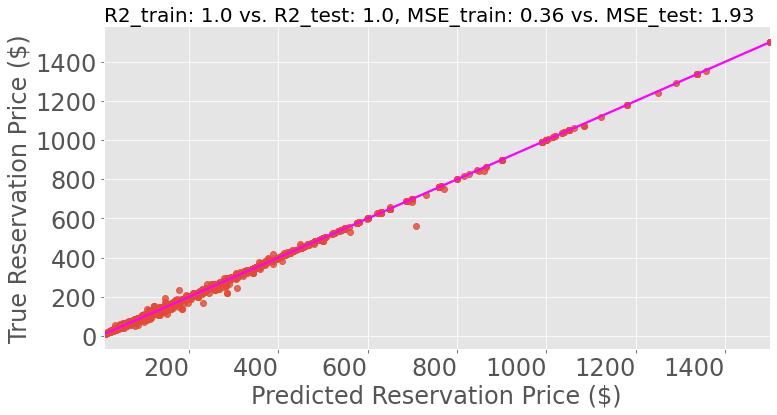

In [63]:
#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)


# Calculate Predictive Performance Measures
#MSE respectively for train/test sets
print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))

#R^2 respectively for train/test sets
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))


#Reproduce the plot of prediction on the test set versus the real ones
df_pred=pd.DataFrame(list(zip(y_test["price"],y_test_preds)),
              columns=['True_ReservationPrice','Predicted_ReservationPrice'])
sns.lmplot(data=df_pred, x='True_ReservationPrice', y='Predicted_ReservationPrice',line_kws={'color': 'fuchsia'},height=5, aspect=2)
plt.ylabel("True Reservation Price ($)",fontsize=24)
plt.xlabel("Predicted Reservation Price ($)",fontsize=24)
plt.title("Predicted vs. True Reservation Prices",loc='left',fontsize=24)
plt.xticks( ha="right",fontsize=24)
plt.yticks(fontsize=24)
plt.title('R2_train: ' + str(round(r2_score(y_train, y_train_preds),2))+' vs. ' + 'R2_test: ' + str(round(r2_score(y_test, y_test_preds),2))+', '+'MSE_train: ' + str(round(mean_squared_error(y_train, y_train_preds),2))+' vs. ' + 'MSE_test: ' + str(round(mean_squared_error(y_test, y_test_preds),2)),loc="left",fontsize=20)

In [ ]:
', ' 'MSE_train: ' + str(round(r2_score(y_test, y_test_preds),2))+' vs. ' + 'MSE_test: ' + str(round(mean_squared_error(y_train, y_train_preds),2))

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

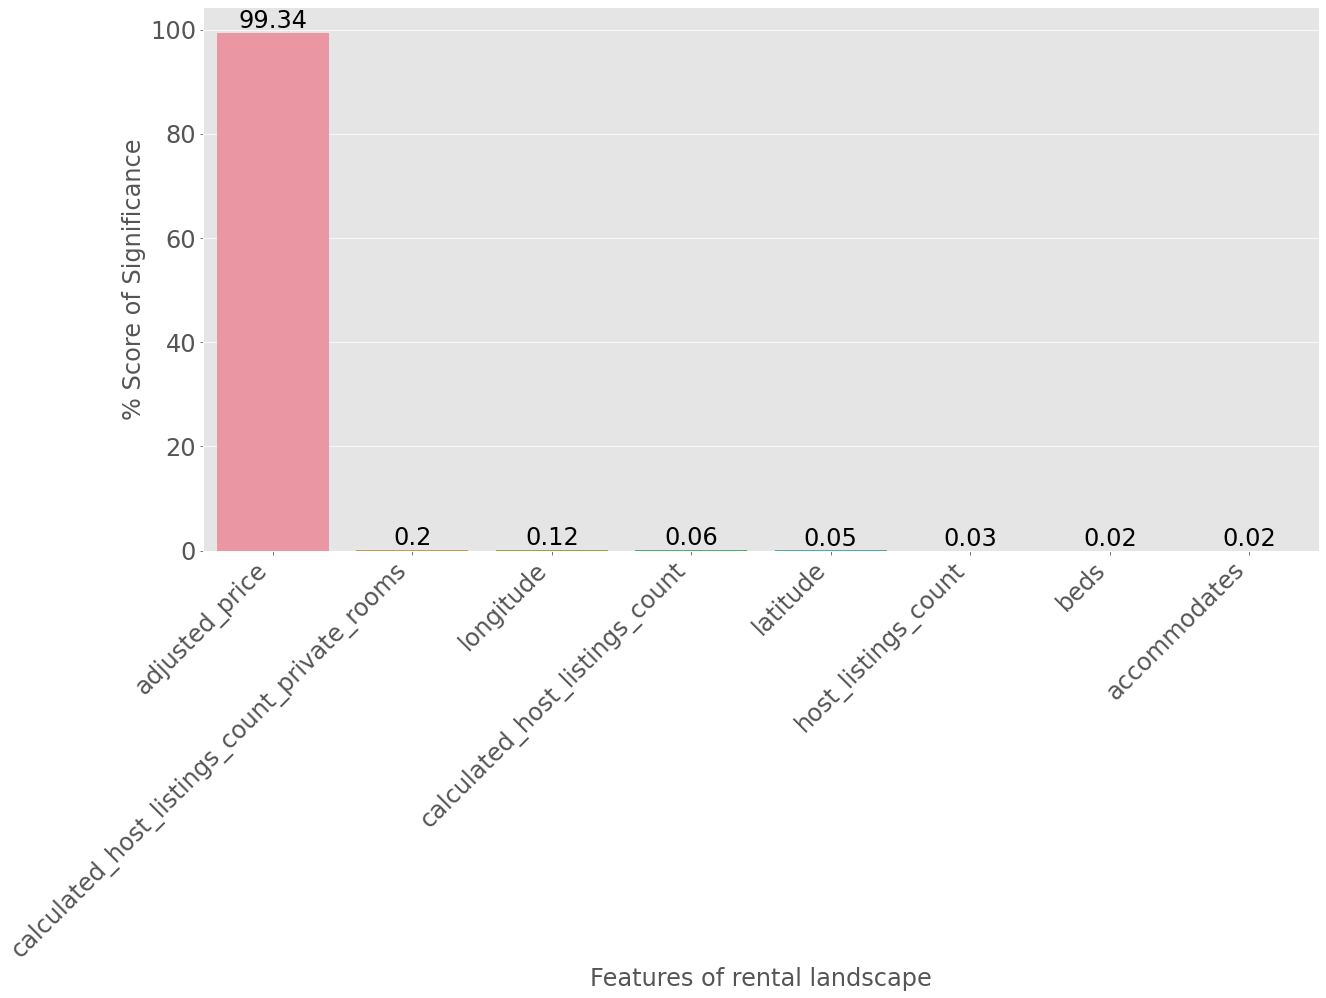

In [48]:
#Feature Importance Plot
fet_ind = np.argsort(forest.feature_importances_)[::-1]
fet_imp = forest.feature_importances_[fet_ind]
labels = np.array(X.columns)[fet_ind]
my=pd.Series(fet_imp, index=labels)
my=round(my[my>=0.0002]*100,2)
my=pd.DataFrame({'Variable':my.index, 'Score':my.values})
plt.figure(figsize=(20, 10))
splot=sns.barplot(x="Variable",y="Score",data=my)
plt.bar_label(splot.containers[0],fontsize=24)
plt.xlabel("Features of rental landscape", fontsize=24)
plt.ylabel("% Score of Significance", fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)